## Preprocessing

In [1]:
import pandas as pd
import numpy as np
#
import warnings
warnings.filterwarnings("ignore")
#

In [2]:
path_to_file = "../data/Component_Faults_Data.csv"
df = pd.read_csv(path_to_file)

In [3]:
x = df.iloc[:, :48].values
y = df["class"].values.reshape(-1, 1)

In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(x)

In [5]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

## Helper class for building, training, testing NN, and plotting results

In [23]:
class NN:

    # params for building model
    input_layer_dim = 48
    output_layer_dim = 11

    def build(self, number_of_hidden_layers=1, number_of_units_per_layer=48,
              activation_function='relu', loss_function='categorical_crossentropy', optimizer='sgd'):

        from keras.models import Sequential
        from keras.layers import Dense

        model = Sequential()
        # Input layer
        model.add(Dense(number_of_units_per_layer, input_dim=self.input_layer_dim, activation=activation_function))
        # Hidden layer
        for i in range(number_of_hidden_layers):
            model.add(Dense(number_of_units_per_layer, activation=activation_function))
        # Output layer
        model.add(Dense(self.output_layer_dim, activation='softmax'))

        model.compile(loss=loss_function, optimizer=optimizer, metrics=['accuracy'])

        return model

    @staticmethod
    def train(model, epochs=100, batch_size=64):
        # xtrain and ytrain are from preprocessing
        history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)
        return model, history
    
    @staticmethod
    def test(model):
        y_pred = model.predict(x_test)
        # Converting predictions to label
        pred = list()
        for i in range(len(y_pred)):
            pred.append(np.argmax(y_pred[i]))
        # Converting one hot encoded test label to label
        test = list()
        for i in range(len(y_test)):
            test.append(np.argmax(y_test[i]))

        from sklearn.metrics import accuracy_score
        accuracy = accuracy_score(pred, test)
        return accuracy

In [9]:
# nn = NN()
#res_acc_per_param = {}
#
#for j in range(4, 6):
#    model = nn.build(number_of_hidden_layers=j, number_of_units_per_layer=48)
#    trained_model, history = nn.train(model, x_train, y_train, batch_size=64, epochs=100)
#    accuracy = nn.test(trained_model)
#    
#    res_acc_per_param.update({j: accuracy})

## Newer Solution

In [39]:
class NeuralNetworkParameterTester:

    # params for building model
    input_layer_dim = 48
    output_layer_dim = 11
    
    param_list = {}    
    acc_per_param = {}
    
    def __init__(self, param_name, param_val_list,
                 activation_function='relu', loss_function='categorical_crossentropy', optimizer='sgd'):
        acc_per_param = {}

        for val in param_val_list:
            # For Build
            if param_name == "number_of_hidden_layers":
                model = self.build(activation_function, loss_function, optimizer, number_of_hidden_layers=val)
            elif param_name == "number_of_units_per_layer":
                model = self.build(activation_function, loss_function, optimizer, number_of_units_per_layer=val)
            elif param_name == "activation_function":
                model = self.build(activation_function, loss_function, optimizer, activation_function=val)
            elif param_name == "loss_function":
                model = self.build(activation_function, loss_function, optimizer, loss_function=val)
            elif param_name == "optimizer":
                model = self.build(activation_function, loss_function, optimizer, optimizer=val)
            else:
                model = self.build()
                
            # For train
            if param_name == "epochs":
                trained_model, history = self.train(model, epochs=val)
            elif param_name == "batch_size":
                trained_model, history = self.train(model, batch_size=val)
            else:
                trained_model, history = self.train(model)
            
            accuracy = self.test(trained_model)

            acc_per_param.update({val: accuracy})
            
        self.acc_per_param = acc_per_param


    def build(self, activation_function, loss_function, optimizer,
              number_of_hidden_layers=1, number_of_units_per_layer=48):
        
        self.param_list.update({"number_of_hidden_layers": number_of_hidden_layers, 
                               "number_of_units_per_layer": number_of_units_per_layer,
                               "activation_function": activation_function,
                               "loss_function": loss_function,
                               "optimizer": optimizer})

        from keras.models import Sequential
        from keras.layers import Dense

        model = Sequential()
        # Input layer
        model.add(Dense(number_of_units_per_layer, input_dim=self.input_layer_dim, activation=activation_function))
        # Hidden layer
        for i in range(number_of_hidden_layers):
            model.add(Dense(number_of_units_per_layer, activation=activation_function))
        # Output layer
        model.add(Dense(self.output_layer_dim, activation='softmax'))

        model.compile(loss=loss_function, optimizer=optimizer, metrics=['accuracy'])

        return model

    def train(self, model, epochs=100, batch_size=64):
        self.param_list.update({"epochs": epochs, "batch_size": batch_size})
        # xtrain and ytrain are from preprocessing
        history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)
        return model, history
    
    @staticmethod
    def test(model):
        y_pred = model.predict(x_test)
        # Converting predictions to label
        pred = list()
        for i in range(len(y_pred)):
            pred.append(np.argmax(y_pred[i]))
        # Converting one hot encoded test label to label
        test = list()
        for i in range(len(y_test)):
            test.append(np.argmax(y_test[i]))

        from sklearn.metrics import accuracy_score
        accuracy = accuracy_score(pred, test)
        return accuracy

In [53]:
class Plotter:

    def plot(self, result, variable_param_name, dim=2):
        if dim == 2:
            self.plot_2d(result, variable_param_name)


    @staticmethod
    def plot_2d(result, variable_param_name):

        import matplotlib.pyplot as plt

        plt.plot(list(result.keys()), list(result.values()))
        plt.title("Acurracy per " + "'" + variable_param_name + "'")
        plt.ylabel("Acurracy")
        plt.xlabel(variable_param_name)
        plt.show()

## Test NN with parameters

In [41]:
nnpt = NeuralNetworkParameterTester("number_of_units_per_layer", [1, 2, 3])

Epoch 1/100
26329/26329 [==============================] - 1s 43us/step - loss: 2.4069 - acc: 0.0935
Epoch 2/100
26329/26329 [==============================] - 0s 17us/step - loss: 2.3993 - acc: 0.0834
Epoch 3/100
26329/26329 [==============================] - 0s 18us/step - loss: 2.3970 - acc: 0.0921
Epoch 4/100
26329/26329 [==============================] - 0s 19us/step - loss: 2.3947 - acc: 0.1068
Epoch 5/100
26329/26329 [==============================] - 0s 18us/step - loss: 2.3914 - acc: 0.1134
Epoch 6/100
26329/26329 [==============================] - 0s 18us/step - loss: 2.3823 - acc: 0.1172
Epoch 7/100
26329/26329 [==============================] - 0s 17us/step - loss: 2.3226 - acc: 0.1294
Epoch 8/100
26329/26329 [==============================] - 0s 17us/step - loss: 2.1093 - acc: 0.1848
Epoch 9/100
26329/26329 [==============================] - 0s 17us/step - loss: 1.9726 - acc: 0.1956
Epoch 10/100
26329/26329 [==============================] - 0s 17us/step - loss: 1.8893 - a

26329/26329 [==============================] - 0s 17us/step - loss: 1.2719 - acc: 0.4161
Epoch 82/100
26329/26329 [==============================] - 0s 17us/step - loss: 1.2704 - acc: 0.4154
Epoch 83/100
26329/26329 [==============================] - 0s 17us/step - loss: 1.2690 - acc: 0.4172
Epoch 84/100
26329/26329 [==============================] - 0s 17us/step - loss: 1.2678 - acc: 0.4147
Epoch 85/100
26329/26329 [==============================] - 0s 18us/step - loss: 1.2662 - acc: 0.4183
Epoch 86/100
26329/26329 [==============================] - 0s 18us/step - loss: 1.2648 - acc: 0.4187
Epoch 87/100
26329/26329 [==============================] - 0s 17us/step - loss: 1.2632 - acc: 0.4149
Epoch 88/100
26329/26329 [==============================] - 0s 17us/step - loss: 1.2622 - acc: 0.4163
Epoch 89/100
26329/26329 [==============================] - 0s 17us/step - loss: 1.2610 - acc: 0.4164
Epoch 90/100
26329/26329 [==============================] - 0s 17us/step - loss: 1.2589 - acc: 

26329/26329 [==============================] - 0s 17us/step - loss: 0.7235 - acc: 0.6494
Epoch 62/100
26329/26329 [==============================] - 0s 17us/step - loss: 0.7221 - acc: 0.6485
Epoch 63/100
26329/26329 [==============================] - 0s 17us/step - loss: 0.7202 - acc: 0.6497
Epoch 64/100
26329/26329 [==============================] - 0s 18us/step - loss: 0.7187 - acc: 0.6462
Epoch 65/100
26329/26329 [==============================] - 0s 17us/step - loss: 0.7164 - acc: 0.6521
Epoch 66/100
26329/26329 [==============================] - 0s 18us/step - loss: 0.7157 - acc: 0.6469
Epoch 67/100
26329/26329 [==============================] - 0s 17us/step - loss: 0.7139 - acc: 0.6516
Epoch 68/100
26329/26329 [==============================] - 0s 17us/step - loss: 0.7130 - acc: 0.6533
Epoch 69/100
26329/26329 [==============================] - 0s 17us/step - loss: 0.7116 - acc: 0.6597
Epoch 70/100
26329/26329 [==============================] - 0s 17us/step - loss: 0.7109 - acc: 

26329/26329 [==============================] - 1s 19us/step - loss: 0.7471 - acc: 0.6847
Epoch 42/100
26329/26329 [==============================] - 0s 18us/step - loss: 0.7344 - acc: 0.6881
Epoch 43/100
26329/26329 [==============================] - 0s 17us/step - loss: 0.7216 - acc: 0.6970
Epoch 44/100
26329/26329 [==============================] - 0s 17us/step - loss: 0.7083 - acc: 0.7021
Epoch 45/100
26329/26329 [==============================] - 0s 17us/step - loss: 0.6949 - acc: 0.7130
Epoch 46/100
26329/26329 [==============================] - 0s 17us/step - loss: 0.6809 - acc: 0.7214
Epoch 47/100
26329/26329 [==============================] - 0s 18us/step - loss: 0.6670 - acc: 0.7287
Epoch 48/100
26329/26329 [==============================] - 0s 18us/step - loss: 0.6521 - acc: 0.7412
Epoch 49/100
26329/26329 [==============================] - 0s 17us/step - loss: 0.6365 - acc: 0.7524
Epoch 50/100
26329/26329 [==============================] - 0s 17us/step - loss: 0.6199 - acc: 

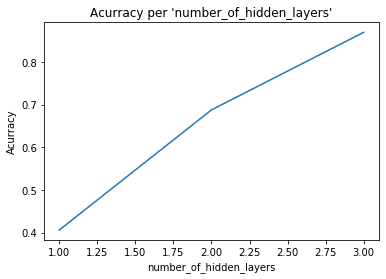


Parameters:

number_of_units_per_layer :	 3
activation_function :		 relu
loss_function :		 categorical_crossentropy
optimizer :		 sgd
epochs :		 100
batch_size :		 64


In [74]:
Plotter().plot(nnpt.acc_per_param, "number_of_hidden_layers")
print("\nParameters:\n")
for index, key in enumerate(nnpt.param_list.keys()):
    if key != "number_of_hidden_layers":
        if index == 1:
            print(key, ":\t", nnpt.param_list[key])
        if index != 1:
            print(key, ":\t\t", nnpt.param_list[key])